In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping

# Load the datasets
train_ds = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\kaggle_multiple\train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),  # Adjusted to MobileNet's default input size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\kaggle_multiple\val",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
)

# Save the number of classes before mapping
num_classes = len(train_ds.class_names)

# Normalize the images
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Load the MobileNet model as a base model
base_model = tf.keras.applications.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model layers to prevent their weights from updating during training
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce spatial dimensions
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)



# Add the output layer with the correct number of classes
output = Dense(num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    epochs=32,
    validation_data=validation_ds,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
)




Found 696 files belonging to 9 classes.
Found 180 files belonging to 9 classes.
Epoch 1/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2780 - loss: 1.9549 - val_accuracy: 0.6444 - val_loss: 1.0760
Epoch 2/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7209 - loss: 0.9081 - val_accuracy: 0.7000 - val_loss: 0.8121
Epoch 3/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7854 - loss: 0.6149 - val_accuracy: 0.7556 - val_loss: 0.7591
Epoch 4/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 974ms/step - accuracy: 0.8412 - loss: 0.4639 - val_accuracy: 0.7500 - val_loss: 0.6880
Epoch 5/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 979ms/step - accuracy: 0.8981 - loss: 0.3696 - val_accuracy: 0.7833 - val_loss: 0.6086
Epoch 6/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 998ms/step - accuracy: 0.9086 - loss: 0.2891 - val_accuracy: 0.7389 - val_loss: 0.7272
Epoch 7/32
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9363 - loss: 0.2356 - val_accuracy: 0.7889 - val_loss: 0.5662
Epoch 8/32
22/22 ━━━━━━━━━━━━

In [39]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


# Get the final accuracy after the last epoch:
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]
print(f"Final Training Accuracy: {final_train_accuracy*100}")
print(f"Final Validation Accuracy: {final_val_accuracy*100}")

Final Training Accuracy: 99.56896305084229
Final Validation Accuracy: 80.55555820465088


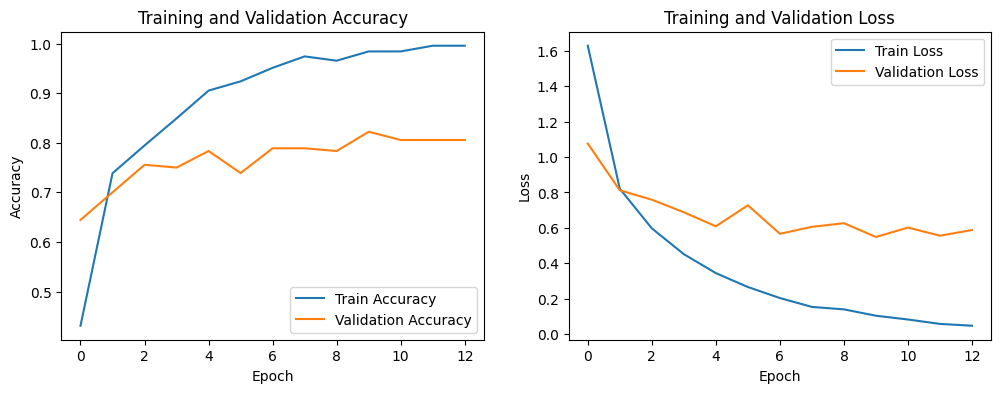

In [40]:
import matplotlib.pyplot as plt
import numpy as np


# Plot training & validation accuracy and loss values
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.show()

plot_training_history(history)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


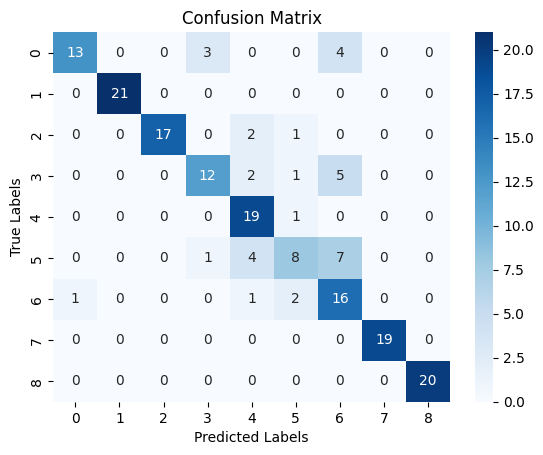

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       1.00      1.00      1.00        21
           2       1.00      0.85      0.92        20
           3       0.75      0.60      0.67        20
           4       0.68      0.95      0.79        20
           5       0.62      0.40      0.48        20
           6       0.50      0.80      0.62        20
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20

    accuracy                           0.81       180
   macro avg       0.83      0.81      0.80       180
weighted avg       0.83      0.81      0.80       180



In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset
for images, labels in validation_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Predict probabilities
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
3
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
print("Classification Report:\n")
report = classification_report(y_true, y_pred, target_names=class_names, digits=2)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


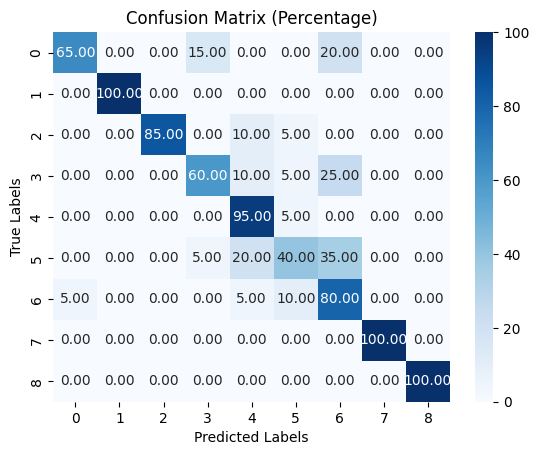

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       1.00      1.00      1.00        21
           2       1.00      0.85      0.92        20
           3       0.75      0.60      0.67        20
           4       0.68      0.95      0.79        20
           5       0.62      0.40      0.48        20
           6       0.50      0.80      0.62        20
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        20

    accuracy                           0.81       180
   macro avg       0.83      0.81      0.80       180
weighted avg       0.83      0.81      0.80       180



In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset
for images, labels in validation_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Predict probabilities
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix by row (true labels)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot normalized confusion matrix
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentage)")
plt.show()

# Generate classification report
print("Classification Report:\n")
report = classification_report(y_true, y_pred, target_names=class_names, digits=2)
print(report)


In [43]:
from sklearn.metrics import precision_recall_fscore_support

# Generate classification report percentages
precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, average=None, labels=range(len(class_names))
)

# Format report as percentages
print("\nClassification Report (in percentages):\n")
print(f"{'Class':<20}{'Precision (%)':<15}{'Recall (%)':<15}{'F1-Score (%)':<15}{'Support':<10}")
print("-" * 70)
for i, class_name in enumerate(class_names):
    print(
        f"{class_name:<20}{precision[i] * 100:<15.2f}{recall[i] * 100:<15.2f}"
        f"{f1[i] * 100:<15.2f}{support[i]:<10}"
    )

# Overall metrics
accuracy = np.mean(y_true == y_pred)
print("\nOverall Accuracy: {:.2f}%".format(accuracy * 100))




Classification Report (in percentages):

Class               Precision (%)  Recall (%)     F1-Score (%)   Support   
----------------------------------------------------------------------
0                   92.86          65.00          76.47          20        
1                   100.00         100.00         100.00         21        
2                   100.00         85.00          91.89          20        
3                   75.00          60.00          66.67          20        
4                   67.86          95.00          79.17          20        
5                   61.54          40.00          48.48          20        
6                   50.00          80.00          61.54          20        
7                   100.00         100.00         100.00         19        
8                   100.00         100.00         100.00         20        

Overall Accuracy: 80.56%
